# Specifying Surface Aerosol Emissions for Simulations with Multi-Modal Aerosol

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

TMP_COL = pd.DataFrame()
for cc in clusters:
    dists = sort(COMP_3D['u'][cc][0].index)
    for aa in alts:
        for dd in dists:
            TMP = pd.DataFrame([[cc,aa,dd,COMP_3D['u'][cc][aa][dd],COMP_3D['v'][cc][aa][dd],COMP_3D['w'][cc][aa][dd],COMP_3D['u_perp'][cc][aa][dd],COMP_3D['v_perp'][cc][aa][dd],COMP_3D['qv'][cc][aa][dd],COMP_3D['qc'][cc][aa][dd],COMP_3D['qr'][cc][aa][dd],COMP_3D['qic'][cc][aa][dd],COMP_3D['qid'][cc][aa][dd],COMP_3D['qif'][cc][aa][dd]]],columns=['cluster','z','dist_side','u','v','w','u_perp','v_perp','qv','qc','qr','qic','qid','qif'])
            TMP_COL = pd.concat([TMP_COL,TMP])
            

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.1600000000000001
1.17
1.1

Text(0.5, 1.0, 'Surface Flux according to Jaegle et al. (2011)')

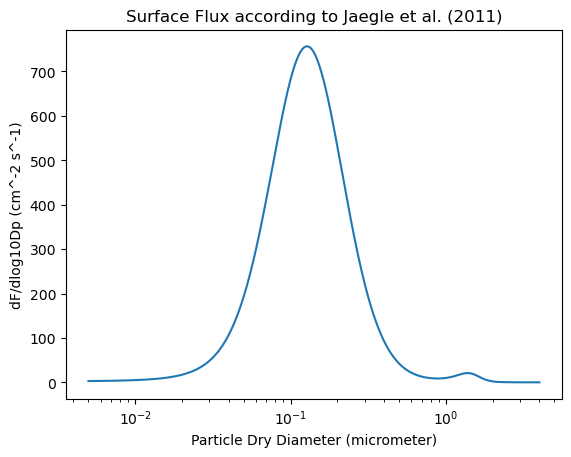

In [93]:
## use coefficients by Jaegle et al. (2011) to generate a small data base of surface flux size distribution
SST = 5
vh = 20
STEP = 0.001

JAEGLE_DAT = pd.DataFrame()
## loop over a range of diameters
for DD in np.arange(0.01,8.,STEP): 
    A = 4.7*(1 + 30 * (DD/2))**(-0.017*(DD/2)**(-1.44))
    B =(0.433 - np.log(DD/2))/0.433
    SST_TERM = (0.3 + 0.1*SST - 0.0076*SST**2.0 + 0.00021*SST**3.0)
    
    FN = SST_TERM*1.373*vh**3.41*(DD/2)**(-A)*(1+0.057*(DD/2)**3.45)*10**(1.607*np.exp(-B**2.0)) / 100 /100
    
    ## store in data frame
    TMP = pd.DataFrame([[DD/2,FN,vh,SST]],columns=['Dp','FN','vh','SST'])
    JAEGLE_DAT = pd.concat([JAEGLE_DAT,TMP])


plt.plot(JAEGLE_DAT['Dp'],JAEGLE_DAT['FN'])
plt.xscale("log",base=10)
plt.xlabel('Particle Dry Diameter (micrometer)')
plt.ylabel('dF/dlog10Dp (cm^-2 s^-1)')
plt.title('Surface Flux according to Jaegle et al. (2011)')

In [106]:
JAEGLE_DAT.loc[JAEGLE_DAT['Dp'] >= 0.1 - STEP/2]

,Dp,FN,vh,SST
0,0.1000,681.820949,20,5
0,0.1005,684.668523,20,5
0,0.1010,687.457141,20,5
0,0.1015,690.186851,20,5
0,0.1020,692.857717,20,5
...,...,...,...,...
0,3.9975,0.030547,20,5
0,3.9980,0.030539,20,5
0,3.9985,0.030532,20,5
0,3.9990,0.030524,20,5


In [108]:
## partition into two groups and integrate over size

def split_flux(DAT,D_s,STEP):
    num_1 = np.sum(DAT.loc[DAT['Dp'] <  D_s - STEP/2]['FN'] * np.log10((DAT.loc[DAT['Dp'] <  D_s - STEP/2]['Dp']+STEP) / DAT.loc[DAT['Dp'] <  D_s- STEP/2]['Dp']))
    num_2 = np.sum(DAT.loc[DAT['Dp'] >= D_s - STEP/2]['FN'] * np.log10((DAT.loc[DAT['Dp'] >= D_s - STEP/2]['Dp']+STEP) / DAT.loc[DAT['Dp'] >= D_s - STEP/2]['Dp']))
    
    return [num_1/(num_1 + num_2),num_2/(num_1 + num_2)]

PARTITION_DAT = pd.DataFrame()
## loop over a range of diameters
for DD_split in np.arange(np.log(0.01),np.log(1.5),0.01): 
    TMP = split_flux(JAEGLE_DAT,D_s = np.exp(DD_split),STEP=STEP)
    TMP_DAT = pd.DataFrame([[TMP[0],TMP[1],np.exp(DD_split)]],columns=['num_1','num_2','D_split'])
    PARTITION_DAT = pd.concat([PARTITION_DAT,TMP_DAT])
    

Text(0.5, 1.0, 'Partitioning of Surface Flux')

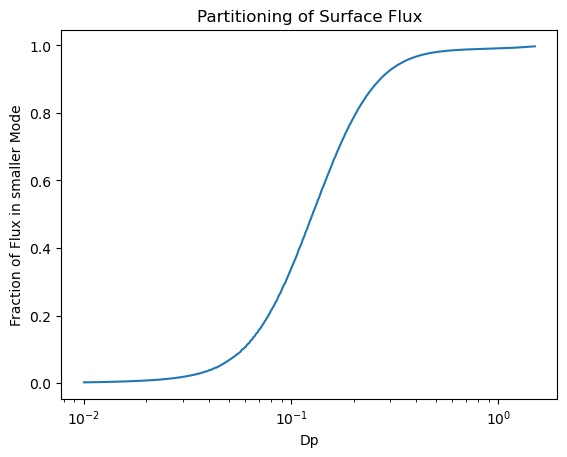

In [109]:
plt.plot(PARTITION_DAT['D_split'],PARTITION_DAT['num_1'])
plt.xscale("log")
plt.xlabel('Dp')
plt.ylabel('Fraction of Flux in smaller Mode')
plt.title('Partitioning of Surface Flux')

In [156]:
## utilize modes as specified by aerosol team (i.e., A. Williams and L. Russell)
PSD_zsm = pd.read_excel('https://docs.google.com/spreadsheets/d/' +
                        '1q4YkJc5dF-ZOIx-xWU_IkmTYCUPoM0kODj5ro_7Vg_c' +
                        '/export?gid=0&format=xlsx',
                        sheet_name='PSD')

## apply simple determination of splitting point based on middle mode
D_split = np.exp(np.log(PSD_zsm['D_g'][1]*1000) + 3*np.log(PSD_zsm['sigma_g'][1]))/1000

## look up proportion of flux 
PARTITION_DAT['Dp_dist'] = np.abs(PARTITION_DAT['D_split'] - D_split)
PARTITION_DAT.loc[PARTITION_DAT['Dp_dist']==PARTITION_DAT['Dp_dist'].min()]

,num_1,num_2,D_split,D_split_log,D_split_log2,Dp_dist
0,0.98454,0.01546,0.573975,-0.55517,0.308214,0.000535
